# Proyecto Optimización
## Modulo 3
## Tema optimización de costo de gasolina en relación con las rutas del chofer 
### Fecha 16/11/2024
### Antonio Ortegón Muñoz
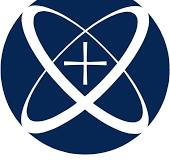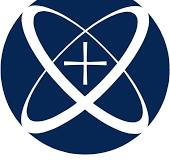

## Introducción

Lo que se pretende realizar es optimizar el costo de la gasolina que se hace semanamente en relación con las enteregas del chofer a la hora de ir a las distintar obras. El impacto que se busca tener es abaratar el costo de las obras mediante el gasto excesivo de gasolina. La relación que tiene con la ingeneria civil, es que, como anteriormente se mencionó, abartar el costo de las obras mediante la creación de ruta más optima para poder entregar el material a la obra. 

## Marco Teórico

Los conceptos que se deben de explicar son muy pocos, sin embargo, sí es importante dimensionar que aunque pareciera muy inutil es gasto de la gasolina en la obra, este concepto engloba muchas cosas más. Como es el tiempo de traslado, los costos, el tiempo de entrega de obra, etc. 
# Falta agregar el algoritmo de 

## Objetivos
- Demostrar que el ahorro un ahorro de distancias y gasolina
## Objetivos especificos
- Mediante el uso de la programación y una lista de las distinas obras que se tienen en la ciudad mostar que puede haber un ahorro
- Se busca relacionar huristica y los métodos de busqueda

## Programación

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

distancias=pd.read_excel("Proyecto Modulo 3.xlsx", sheet_name=0).set_index("Unnamed: 0")
distancias

,Oficina,Naucalpan,Santa fe,Lomas,Satelite
Unnamed: 0,,,,,
Oficina,0,5,8,12,25
Naucalpan,5,0,3,7,20
Santa fe,8,3,0,4,17
Lomas,12,9,4,0,13
Satelite,25,20,17,13,0


In [83]:
gasolinas=pd.read_excel("Proyecto Modulo 3.xlsx", sheet_name=1).set_index("Unnamed: 0")
gasolinas

,Oficina,Naucalpan,Santa fe,Lomas,Satelite
Unnamed: 0,,,,,
Lunes,500,600,300,400,1800
Martes,800,250,0,350,200
Miércoles,400,0,200,1300,300
Jueves,0,300,1000,400,250
Viernes,450,0,350,1700,1600


In [85]:
lugares=distancias.index.tolist()
lugares

['Oficina', 'Naucalpan', 'Santa fe', 'Lomas', 'Satelite']

In [87]:
#Op1 Oficina
ofi=lugares[0]
obras=lugares[1:]
ofi, obras

('Oficina', ['Naucalpan', 'Santa fe', 'Lomas', 'Satelite'])

In [89]:
#Algorimto de Dijkstra 
def dijk(m_distancias, inicio): 
    no_visitados=set(m_distancias.index)# se creara un conjunto de datos
    d_min={nodo:np.inf for nodo in m_distancias.index}
    d_min[inicio]=0
    while no_visitados: 
        nodo_a=min(no_visitados, key=lambda nodo: d_min[nodo])
        no_visitados.remove(nodo_a)
        for i in m_distancias.columns: 
            if i in no_visitados: 
                new_d=d_min[nodo_a]+m_distancias.loc[nodo_a, i]
                if new_d<d_min[i]: 
                    d_min[i]=new_d
    return d_min

Lo que está pasando aquí es que al inicio todas las distancias son infinitas, menos la inicial, que es la Oficina. Luego va a buscar el nodo más cercano que haya, o el no visitado. Esto terminara generando que se actualicen las distancias para cada i e ira viendo si se puede llegar más rápido si se pasa por el nodo acutal y si es así se actualiza la distancia en el diccionario. 

Esto se irá repitiendo hasta que todos los lugares esten visitando y si quedan lugares que no serán calculadas para que por último quede la distancias minimas y las devuelva. 

In [92]:
d_ofi=dijk(distancias, ofi)
d_ofi

{'Oficina': 0, 'Naucalpan': 5, 'Santa fe': 8, 'Lomas': 12, 'Satelite': 25}

In [94]:
def costo(distancias, costos, lista): 
    c_s={}
    for i in lista:
        c_dias=costos.loc[i]*distancias[i]
        c_s[obra]=c_dias.mean()
    return c_s
costo_promedio=costo(d_ofi, gasolinas, obras)
costo_promedio

KeyError: 'Naucalpan'